## Tehtävä: Opiskelijaryhmän tiedot
* **Kaikkien ryhmään** kuuluvien opiskelijoiden nimet ja JAMK:n opiskelijatunnukset
    * TODO: Timo Laakkonen + AA4598
    
#### Tehtävien pisteytys

* Opintojakson opettaja laskee pisteet palautuksen jälkeen
* Alla kootusti tehtävien maksimipistemäärät

| Teht. 3 | Teht. 4 | Yhteensä |
|---------|---------|----------|
| 5p      | 5p      | max. 10p |

--------------------

# Tehtävä 3: Ongelman kuvaaminen 

Haetaan vastaukset kysymyksiin: 
* Millainen data on kyseessä?
* Missä yhteydessä tästä datasta voi olla hyötyä?
* Millainen liiketoiminta on datan taustalla?
* Mitä kaikkea datasta voidaan oppia?
* Mitä datasta voidaan nähdä?
* Mitä datasta voidaan tunnistaa?
* Voidaanko datasta havaita jotain poikkeavaa?
* Tarvitaanko tämän lisäksi jotakin muuta lisätietoa?

----------
## Tehtävä 3: Vastaus 

----------
#### 3.1 Millainen data on kyseessä?

Kyseessä on data, josta voidaan nähdä päivittäiset vedenkulutuslukemat kuutiometreinä (M3), lukemat on luettu joko sisäisistä ja/tai ulkoisista mittarista kahdella Yorkshire Water-yhtiön jakelun hallinta -alueella Yorkshiressä ajanjaksona  1.1.2012 -31.12.2015. Itseasiassa csv-tiedoston nimessä mainitaan external eli data on kerätty ulkoista mittareista.
Nämä tiedot on saatu paikallisesta vedenkäyttöä tutkivasta projektista.
Datasetti ei sisällä tarkemmin vedenkäyttökohteita/laitteita, vain ja ainoastaan kiinteistökohtaisia päivittäisiä kokonaiskulutuslukemia tiettynä em. ajanjaksona.
Myöskään kiinteistöistä ja niiden omistajista/haltijoista ei ole tietoja, yksityisyys on taattu.
Kyseessä on taulukko-muotoinen data, joka istuu suoraan Pandas DataFarame-rakenteeseen/malliin. Siinä on "nimettyjä" rivejä ja sarakkeita, siis tavallaan aikaleimattuja rivejä (date-sarake), jossa kiinteitönumeroiduissa sarakkeissa ko. päivämäärän mukaisia veden kulutusarvoja. 

Data on yksitasoista eli ei sisäkkäisiä rakenteita.
Seuraavassa joitekin perustietoja ko. datasta.

In [3]:
import pandas as pd
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
display(df)
df2=df.copy()
df2.replace(-1, 0, inplace=True)
# NaN kenttiä koko datassa
print(f"Tyhjiä soluja/puuttuvia arvoja: {df.isna().sum().sum()}")
# rivejä
print(f"Rivejä: {df.shape[0]}") #df.index.size
# sarakkeita 
print(f"Sarakkeita: {df.shape[1]}") # len(df.columns)
# kiintestökohtaisia sarakkeita
count=len(df2.columns)-6
print(f"Kiinteistöjä: {count}")
print(df2.shape)
df2.describe()

,date,1,2,3,5,6,7,8,10,11,...,2154,2155,2156,2157,2158,Year,Month,Day,Week,Weekday
0,2012-01-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2012,1,1,52,Sun
1,2012-01-02,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2012,1,2,1,Mon
2,2012-01-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2012,1,3,1,Tue
3,2012-01-04,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2012,1,4,1,Wed
4,2012-01-05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2012,1,5,1,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2015,12,27,52,Sun
1457,2015-12-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2015,12,28,53,Mon
1458,2015-12-29,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2015,12,29,53,Tue
1459,2015-12-30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2015,12,30,53,Wed


Tyhjiä soluja/puuttuvia arvoja: 0
Rivejä: 1461
Sarakkeita: 2091
Kiinteistöjä: 2085
(1461, 2091)


,1,2,3,5,6,7,8,10,11,12,...,2153,2154,2155,2156,2157,2158,Year,Month,Day,Week
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.047873,0.103475,0.075219,0.132099,0.047307,0.196910,0.163713,0.024900,0.013031,0.166092,...,0.189574,0.194170,0.190914,0.179227,0.320099,0.110806,2013.498973,6.522930,15.729637,26.590007
std,0.068001,0.170929,0.117490,0.195651,0.107489,0.291335,0.243218,0.057338,0.027559,0.245556,...,0.162164,0.145184,0.144358,0.113793,0.242180,0.086095,1.118723,3.449884,8.803105,15.066324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027000,0.000000,0.123000,0.001000,0.000000,2012.000000,4.000000,8.000000,14.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.187000,0.211000,0.207000,0.201000,0.340000,0.128000,2013.000000,7.000000,16.000000,27.000000
75%,0.111000,0.218000,0.173000,0.310000,0.079000,0.477000,0.387000,0.001000,0.028000,0.390000,...,0.283000,0.282000,0.289000,0.256000,0.475000,0.175000,2014.000000,10.000000,23.000000,40.000000
max,0.321000,1.115000,1.416000,1.174000,2.864000,1.392000,1.446000,0.390000,0.644000,1.246000,...,1.878000,1.049000,0.714000,0.526000,1.446000,0.415000,2015.000000,12.000000,31.000000,53.000000


#### 3.2 Missä yhteydessä tästä datasta voi olla hyötyä

Dataa voivat hyödyntää sekä firma itse että myös asiakkaat. 
Jos data olis realiaikaisempaa niin kaikille olisi enemmän arvoa kuin yksittäisestä tutkimuksesta tietyltä aikaväliltä, niin että saa uusimmat datat tarkasteluun. Teknisesti tänä päivänä luulisi olevan monessa kohteessa käytössä etäluku ja  asiakkaan mahdollisuus seurata kulutustansa lähes reliaikaisesti ainakin päivätasolla.

##### 3.2.1 Asiakkaalle (kiinteistön haltija) 

Asiakas voi seurata kulutustottumuksiaaan, tehdä yhteenvetoja eri ajanjaksoina, päivä, viikko, kuukausi, vuosi, jopa viikonpäivä tasolla.
Tarkoitushan olisi järkevämpi ja siten vähempi vedenkulutus.

Olisi tärkeää/hyödyllistä tietää mihin vetta kuluu. Datan perusteella voitaisiin tehdä päätös mm. tekniikan uusimista vähemmän vettäkäyttävään, tekniikka kehittyy mm. uudet pyykinpesukoneet voivat kuluttaa vähemmän vettä.
Tulevaisuuden kodeissa/kiinteistöissä on enemmän älyä, jolloin jokaisessa käyttökohteessa/laitteessa, joka käyttää vettä on mittaussensori niin saadaan tarkempaan syyniin mihin ja paljoinko vettä kuluu.
Näin kulutuksen tarkkailu voisi olla vielä parempaa kun/jos tunnistetaan käyttökohteet kuten suihku, puutarhankastelu astianpsukone yms.  

##### 3.2.2 Yrityksen näkökulmasta, 
Datan perusteella voidaan tehdä ennusteita/arvioita tulevasta tarpeesta, kapasiteetin ja resurssien mitoittamisesta ja takaamisesta eri tilanteissa (myös kriisit, kuivuus, tulvat) ja eri vuodenaikoina.
Lisäkappasiteetti on joskus tarpeen esim. isoista rakennushankkeista johtuen. 
Myös säästöohjelma on joskus tarpeen (kuivuus, luonnonilmiöiden aiheuttamat vauriot). Datan perusteella yritys tietää kapasiteettitarpeesta ja kuluttajien tottumuksista, joiden perusteella vedensäästöohjelma voidaan suunnitella talouskohtaisesti, voidaan asettaa kulleekin taloudelle jokin prosentuaalinen säästä/rajoitus. 
Vesi on joskus ongelma monissa kaupungeissa/kohteissa , joten välillä on otettava pakkokeinojakin käyttöön ja turvata ensissijaisesti priorisoida tärkeiden kohteiden kuten sairaalat yms. vedensaanti. 

Poikkeuksien havaitseminen
-> mittareiden/sensorien korjaaminen/huoltaminen/kalibroiminen
Ongelmien havaitseminen
- putkiston rikkoutuminen/vuoto, hana unohtunut pitkäksi aikaa päälle
- paineongelmat
- jäätyminen 

#### 3.3 Millainen liiketoiminta on datan taustalla?
Puhtaan veden ja kierrätetyn veden toimittaminen/jakelu.
Yrityksen ensisijainen tehtävä on taata häiriötön puhtaan ja laadukkaan veden saatavuus/riittävyys eri tilanteissa.
Myös lisäkapasiteettia/resursseja pitäisi olla saatavilla.
Kierrätyksellä säästetään koska kaikki kohteet eivät vaadi parasta laatua vaan riittävä laatu muttei juomakelpoisuus kelpaa

Voisiko olla niin, että vesiyhtiö on voittoatavoittelematon tai tasaista tuottoa/kannattavuutta tavoittelva yhdyskuntateknikkaan/-palveluun kuuluva perusosanen, elämän perustarpeiden/-edellysten mahdollistaja/toteuttaja. 
Yrityksen tehtävä on ohjata ja kannustaa kuluttajia järkevään veden käyttöön. 
Liiketoiminn kannalta yrityksellehän olisi bisnesmielessä eduksi, että käytetään vettä mahdollisimman paljon, mutta näin ei kuitenkaan taida olla. Mutta jos yritys on hyvää voittoa tavoitteleva yritys niin ei ole yrityksen liiketoiminnan kannalta isossa kuvassa järkevää ohjata ja kannustaa parempiin kulutustottumuksiin. 

#### 3.4 Mitä kaikkea datasta voidaan oppia?
Voidaan oppia se, ettö kuinka kulutus vaihtelee eri ajanjaksoina, data mahdollisesti tuo ennustettavuutta kulutukseen niin 
voidaan ennalta varautua myös mahdollisiin poikkeutilanteisiin.
Kapasiteetti ja resurssit voidaan mitoittaa oikein, myös mahdollisissa käyttökatkos-/ongelmatilanteista kun selvitetäään mistä johtuui niin tietysti voidaan oppia vastaisuuden varalle.
Voidaan oppia kulutustottumuksia tiettyinä esim- kuukausina/vuodenaikoina vuodessa.

#### 3.5 Mitä datasta voidaan nähdä? 
Raakadatasta sellaisenaan ei voida nähdä oikein juuri mitään, mutta kun dataa visualisoidaan ja tehdään yhteenvetoja niin alkaa näkymään se mitä halutaan nähdä tai osataan saada näkyviin.
Tunnusluvut voidaan saada eloon kun visualisoidaan niin voidaan nähdä trendejä, niiden suunta ja suuruus.
 
#### 3.6 Mitä datasta voidaan tunnistaa? 
Kun data on ladattu Pandas DataFrameen ja käytetään joitakin Pandas/NumPy metodeja niin saadaan yhteenvetoja sekä erilaisia tilastollisia tunnuslukuja, joista voidaan tunnistaa hyödyllisiä tietoja kiinteistökohtaisesti tai yleistäen kaikkia kiinteistöjä koskevasti ja/tai aikajaksoihin jakaen.

#### 3.7 Voidaanko datasta havaita jotain poikkeavaa?

Kyllä, erityisesti kiinteistön 163 kulutus syyskuussa 2013.
-1.0 arvoja paljon, mutta onko se poikkevaa kun niitö on tosiaan paljon. Ovat mahd. käyttökatkoksia.

Kappaleen 4.4.2 tarkastelun mukaan arvioituna yli 1 m3 vuorokaudessa olisi jotenkin poikkeavaa kulutusta, 
Niiden osuus määrällisesti hyvin pieni kokonauuden kannalta, mutta suuruudeltaan häritsevän suuria poikkemia, 
jotka vaikuttavat sellaisenaan datajoukossa erilaisten yleisten koko aineistoa koskevien tunnuslukujen ja yhteenvetojen 
tuloksissa. Niille pitää tehdä jotakin, joko poistaa kokonaan tai häivyttää asettamalla keskiarvoon (ilman poikkemia), voiskohan interpinnista olla apua tähän. 
Poikkeavat lukemat voivat paljastaa jonkin tavallisuudesta poikkevan ongelman tai vian, mittalaitte/anturi/sensori toimintahäiriö tms. kyse voi olla myös putkiston ongelmista, rikkoitunut putki, paine-/vuotoongelmat.  

#### 3.8 Tarvitaanko tämän lisäksi jotakin muuta lisätietoa?
Häiriö-/vika-/poikkeusraportti,
Seuraavassa tulosteessa tietoja joista osaa voitaisiin yhdistää kiinteistöihin, niin saatasiin yksilöllisempää ja tarkempaa analyysiä.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_Water_consumer_habits.csv", index_col=0)
pd.set_option('display.max_columns', None)

df.drop('Year', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Unnamed: 97', axis=1, inplace=True)
df.drop('Unnamed: 98', axis=1, inplace=True)

cols=df.head(0)
for col in cols:
    print(col)

Postal outcode
Functional area
County
Latitude
Longitude
Number-Of-Showers
Number-Of-Toilets
Number-Of-Basins
Number-Of-Bathtubs
Number-of-Kitchen-Utility-Taps
Wash-Dishes-By-Hand
Have-Dishwasher
Have-Washing-Machine
Does-Anyone-Own-A-Car
Water-Garden
Use-Pressure-Washer
Number-Of-People
Home-Type
Have-Water-Meter
Cost-Of-Water
Monthly
Cost-Of-Water-Frequency
Water-Heated-With
Shower-Type
Showers-Per-Week
Shower-Duration-Minutes
Shower-Turn-Off-Temporarily
Shower-Leak
Shower-Leak-Rate
Toilet-Type
Toilet-Use-Small-Flush
Toilet-Leak
Toilet-Leak-Rate
Basin-Tap-Type
Basin-Tap-Flow-Rate
Basin-Tap-Leak
Basin-Tap-Leak-Rate
Basin-Tap-Running-Brushing-Teeth
Basin-Shave-Number-Of-People
Basin-Shave-Tap-Running
Bath-Frequency-Per-Week
Bath-Fill-Amount
Bath-Tap-Leak
Bath-Tap-Leak-Rate
Kitchen-Tap-Type
Kitchen-Tap-Flow-Rate
Kitchen-Tap-Leak
Kitchen-Tap-Leak-Rate
Boiling-Water-How
Kettle-How-Much-Water
Boil-Water-Per-Week
Wash-By-Hand-Per-Week
Wash-By-Hand-How
Dishwasher-Per-Week
Dishwasher-Eco
Wash

# Tehtävä 4: Datan kuvaaminen 

* Millaisia muuttujia on datassa?
* Mitä arvoa on käytetty täytearvona?
* Millaisia korrelaatioita datasta löytyy?
* Tarkistelee dataa tietyillä aikaväleillä (esim. viikko, kuukausi tai vuosi). Millaisia havointoja teet?
* Havaintojen tueksi voi liittää kuvia datasta
* Mieti mitä tällä datalla voidaan mahdollisesti tehdä?


#### 4.1 Millaisia muuttujia on datassa? 
Lyhyesti: kyseessä on päivämäärällä leimattuja kulutuslukemia, sarakeotsikot edustavat kiinteistönumeroita 
siis kullakin rivillä on 1. sarake on päivämäärä-sarake, johon liittyy kiinteistökohtaisia kulutuslukemia, viimeisissä sarakkeissa on päivämäärästä johdettuja arvoja (year months day week weekday), halutessa ko. arvoja voidaan johtaa päivämäärästä. Mutta hyvä, että ovat nyt kuitenkin heti saatavissa valmiina.

In [2]:
import pandas as pd
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)

display(df.head(0))

,date,1,2,3,5,6,7,8,10,11,...,2154,2155,2156,2157,2158,Year,Month,Day,Week,Weekday


#### 4.1 Mitä arvoa on käytetty täytearvona? 
Täytearvona on käytetty -1.0
Kysessä lienee käyttökatkot. 
Yhteenvetoja tehdessä pitää tapauskohtaisesti päättää mitä näille täytearvoille arvoille tehdään, muutetaanko arvoon 0 vai poistetaanko kokonaan.

In [16]:
import pandas as pd
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
toRemove = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
df2 = df.copy()
for col in toRemove:
    df2.drop(col, axis=1, inplace=True)
df2.head(10)    

,1,2,3,5,6,7,8,10,11,12,...,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


#### 4.3 Millaisia korrelaatioita datasta löytyy? 
Jokaisella kulutuslukemalla on korrelaatio kiinteistönumeroon ja jokainen kulutuslukema on päivämääräleimattu.
Sarakkeilla year, month, day, week, weekday on korelaation date-sarakkeeseen, ne on johdettu päivämäärästä.
Esimerkki: Seuraavassa kuvassa rivillä 637 päivämäärällä 29.9.2013 voidaan lukea, että kiinteistön 163 kulutus on ollut 11910 m3 (joka on suurin kulutus päivässä koko datassa) ko. päivämäärällä vuosi oli 2013, kuukausi 9, päivä 29, viikko 39, viikonpäivä oli tuolloin sunnuntai. 

In [33]:
import pandas as pd
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
dfx=df.max(numeric_only=True,axis=0)
colmaxname = dfx.idxmax(axis=0)
df2=df[['date',colmaxname,'Year','Month', 'Day', 'Week', 'Weekday']]
index=df2[colmaxname].idxmax()
df2.loc[df2.index==index]

,date,163,Year,Month,Day,Week,Weekday
637,2013-09-29,11910.0,2013,9,29,39,Sun


#### 4.4 Tarkistelee dataa tietyillä aikaväleillä (esim. viikko, kuukausi tai vuosi). Millaisia havaintoja teet?
Osalla kiinteistöjä on kausiluonteisia vaihteluja niin, että käytössä vain tiettyinä kuukausina   

##### 4.4.1 Eniten vettä käyttävä kiinteistö
Vertailussa datan tarkastelussa tiettyinä aikaväleillä kiinnostaa eniten vettä käyttävä kiinteistö ja kuinka vedenkulutus on muuttunut eri aikajaksoina/aikaväliellä/vuosina tarkastelujakson 2012-2015 aikana.

Haetaan datasta suurimman keskimääräisen päivittäisen kulutuksen tekevä kiinteistö. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
toRemove = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
for col in toRemove:
    df2.drop(col, axis=1, inplace=True)
df2.replace(-1, 0, inplace=True)
means=df2.mean().round(4)
colname=means.idxmax(axis=0)
print(f"Kiinteistöllä {colname} on suurin keskimääräinen kulutus päivää kohden tarkastelujaksona vuosina 2012-2015")

maxvalue=means[colname]
print(f"{maxvalue} m3")


Kiinteistöllä 163 on suurin keskimääräinen kulutus päivää kohden tarkastelujaksona vuosina 2012-2015
180.4431 m3


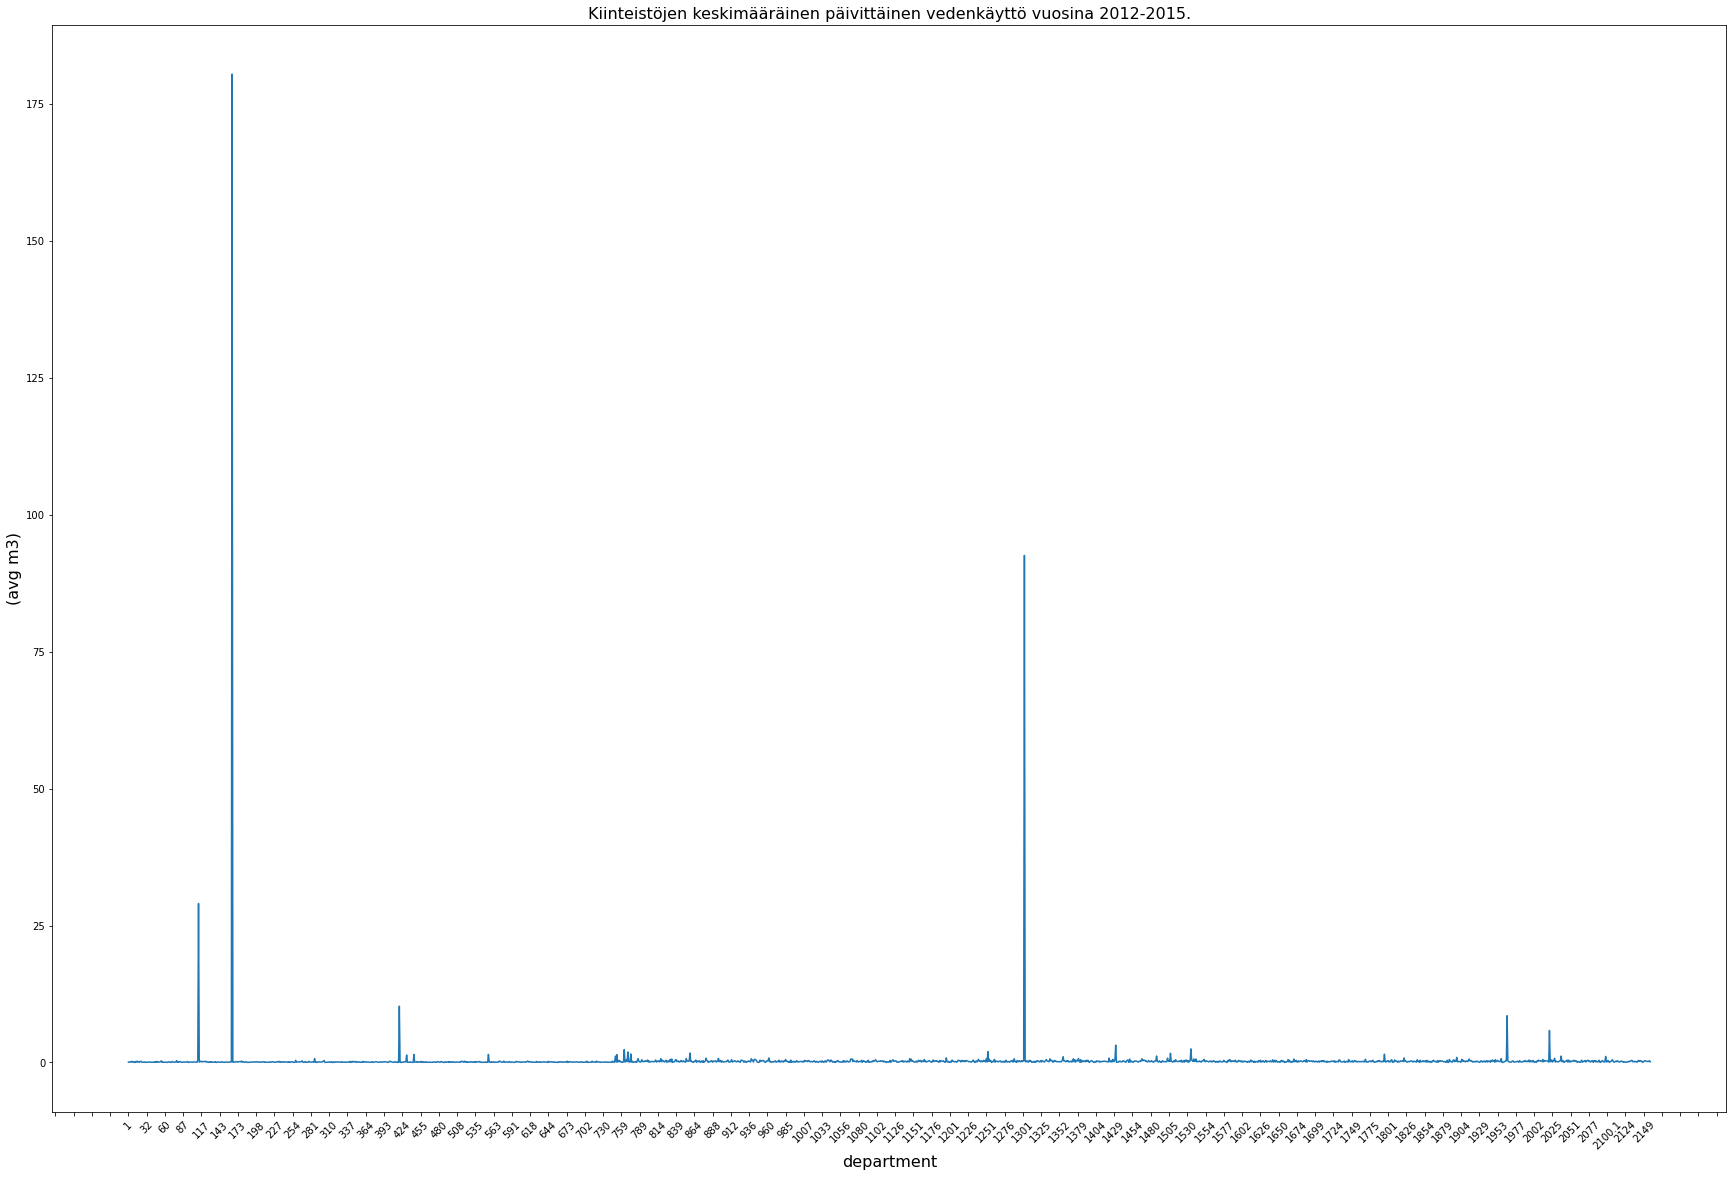

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]

for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(30, 20))
#fig1, ax = plt.subplots(1, 1, sharey=False,figsize=(20, 14))
# keskiarvot kiinteistäjärjestyksessä
ax.set_ylabel('(avg m3)', size=16)
ax.set_xlabel('department', size=16)
#ax.set_xlim('2012-01-01', '2015-12-31')
ax.set_title('Kiinteistöjen keskimääräinen päivittäinen vedenkäyttö vuosina 2012-2015.', size=16)
# x-akselin labelit
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
ax.tick_params(axis='x', rotation=45)
ax.plot(cols, means)

#### 4.4.2 Eniten vettä kuluttavat kiinteistöt

Huomataan em. graafista, huomattavan suuria kulutuspoikkeamia joiden kiinteistöjen kohdalla verrattuna keskivertoon kulutukseen. Laskettaessa koko dataa koskevia analyysejä, vertailuja, yhteenvetoja, trendejä, tunnuslukuja niin nämä poikkeukset vääristävät osaltaan tulosta ja on hyvä selvittää mistä on kyse. Jotta saadaan koko dataa koskeavaa analyysia niin poikkemat pitää häivyttää tai poistaa jotenkin niin saadaan realistisempi kuva ilman poikkeuksia.
-1.0 arvot on korvattu 0:lla, tapauskohtaisesti ne voisi poistaa ja laskea niiden päivien osalta kun on ollut käyttöä niin saataisiin todellinen veden kulutus silloin kun kiinteistössä asutaan.

Seuraavassa laitetaan data suuruusjärjestykseen kulutuksen suhteen niin saadan selvempi kuva mitkä kiinteistöt poikkevat massasta.
Kun keskikulutukset kiinteistöä kohden laitetaan suuruusjrjestykseen huomataan vielä selvemmin poikkeustapausten vallitseva osuus.

163     180.4431
1303     92.5771
113      29.0190
419      10.2755
1965      8.5292
2021      5.8391
1431      3.1693
1535      2.4801
763       2.3512
1253      1.9785
768       1.9220
858       1.7298
1507      1.6760
772       1.5509
1795      1.5038
556       1.4748
445       1.4475
753       1.4284
433       1.3638
1488      1.1790
2038      1.1744
751       1.1555
2099      1.1019
1358      1.0443
1898      0.9197
1196      0.8385
1823      0.8177
962       0.8112
1422      0.7971
1503      0.7832
2028      0.7640
879       0.7635
896       0.7396
1380      0.7324
853       0.7221
1251      0.7177
288       0.7011
1146      0.7007
1958      0.7002
787       0.6919
818       0.6880
1468      0.6803
1338      0.6746
940       0.6745
1289      0.6707
1372      0.6696
1071      0.6461
1539      0.6372
1450      0.6296
834       0.6284
dtype: float64
180.4431355236142


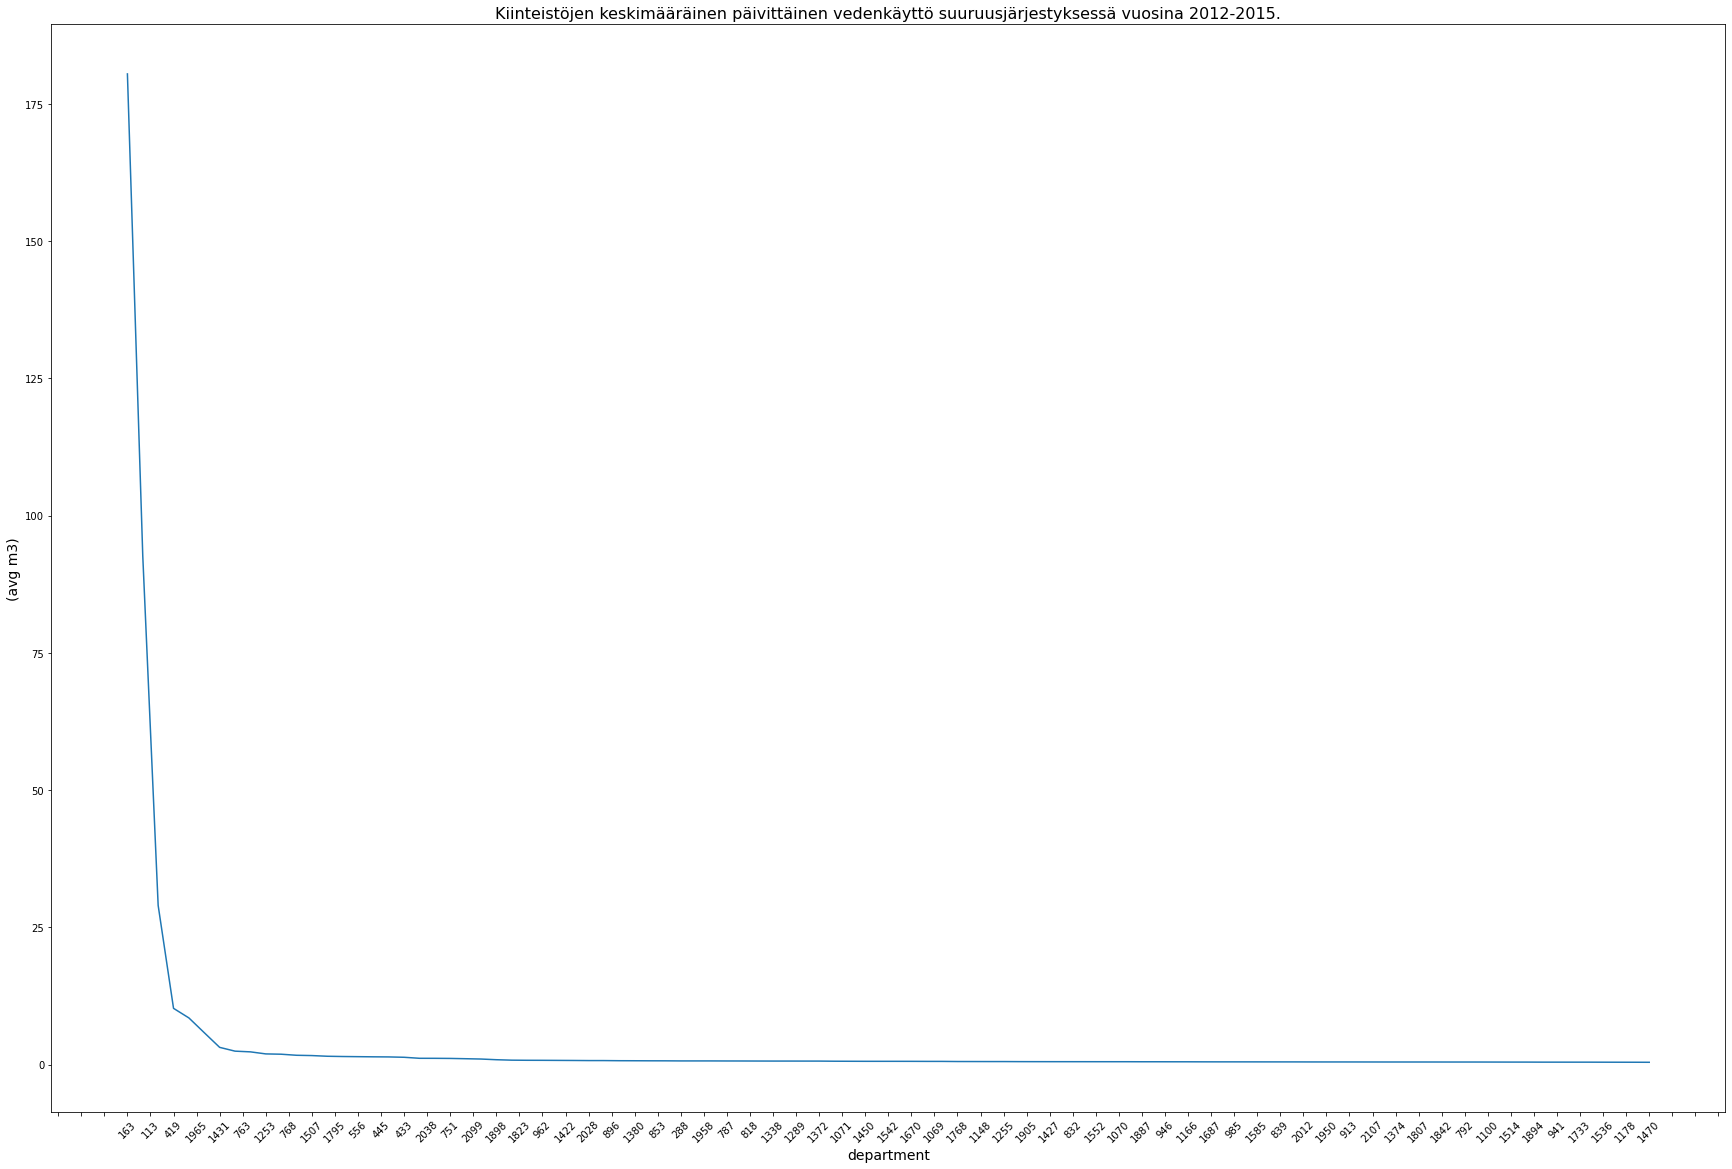

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
deleted_columns = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]


for column_name in deleted_columns:
    df2.drop(column_name, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

# suurimmasta pieninpään järjestykseen
result = means.argsort()
sortedMeans=means[result][::-1]
print(sortedMeans[:50])

sortedCols=cols[result][::-1]

fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(30, 20))

ax.set_ylabel('(avg m3)', size=14)
ax.set_xlabel('department', size=14)
ax.set_title('Kiinteistöjen keskimääräinen päivittäinen vedenkäyttö suuruusjärjestyksessä vuosina 2012-2015.', size=16)
# x-akselin labelit
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
ax.tick_params(axis='x', rotation=45)
ax.plot(sortedCols[:100], sortedMeans[:100])
#ax.plot(cols,df3)
#print(df2['163'][700:])
print(df2['163'].mean())

#### 4.4.3 Kiinteistö 163
Otan tässä tarkasteluun em. suurimman kulutuksen päivää kohden tehneen kiinteistön 163, myös koko aineiston osaltaa keskiarvoja laskettessa kiinteistö 163 vie voiton. 
Koska vuoden 2013 syyskuussa kulutus on ollut huimaa niin eri vuosien kulutusgraafia ei voida laittaa samaan, koska mitta-asteikko on liian suuri "normaali"-kulutuksen näyttämiseksi. 

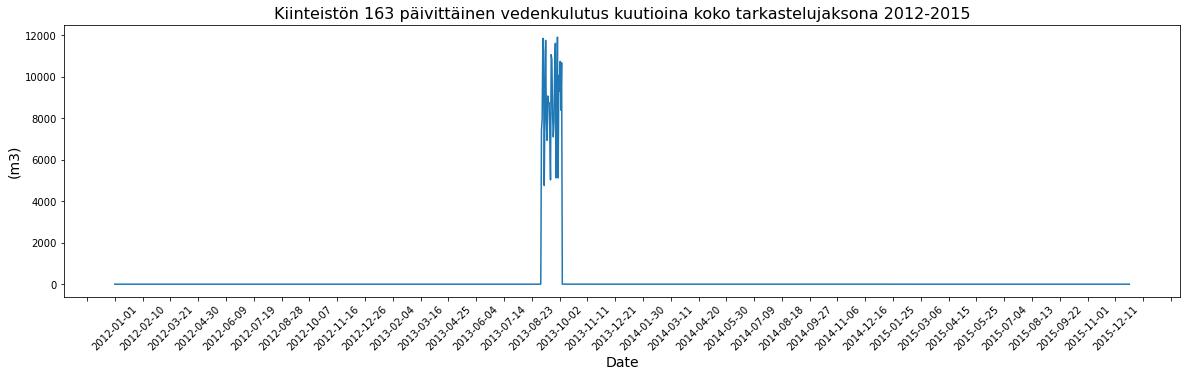

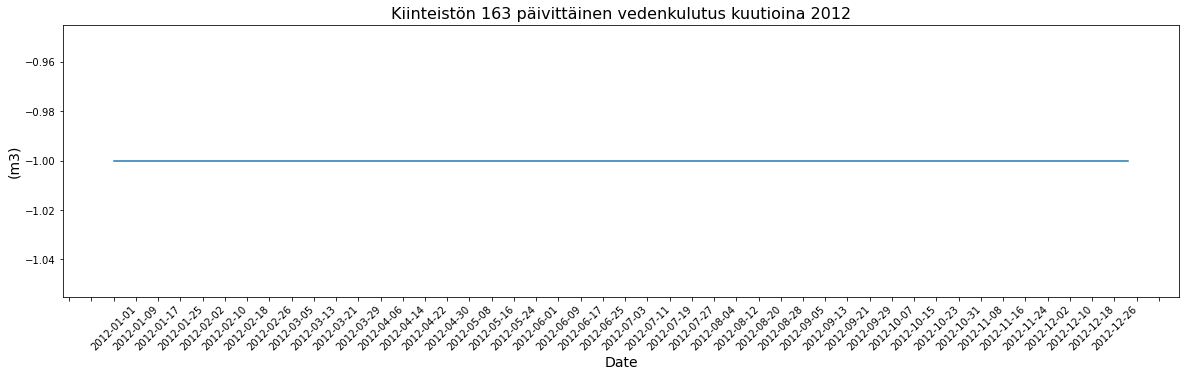

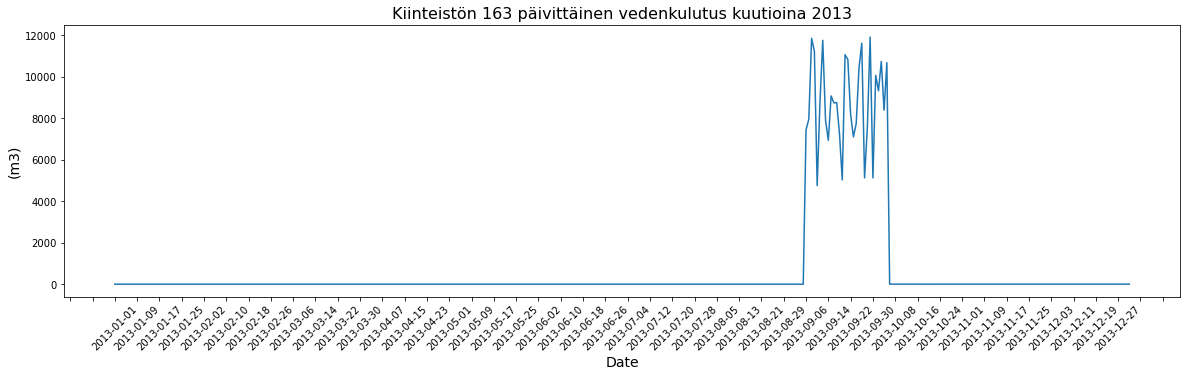

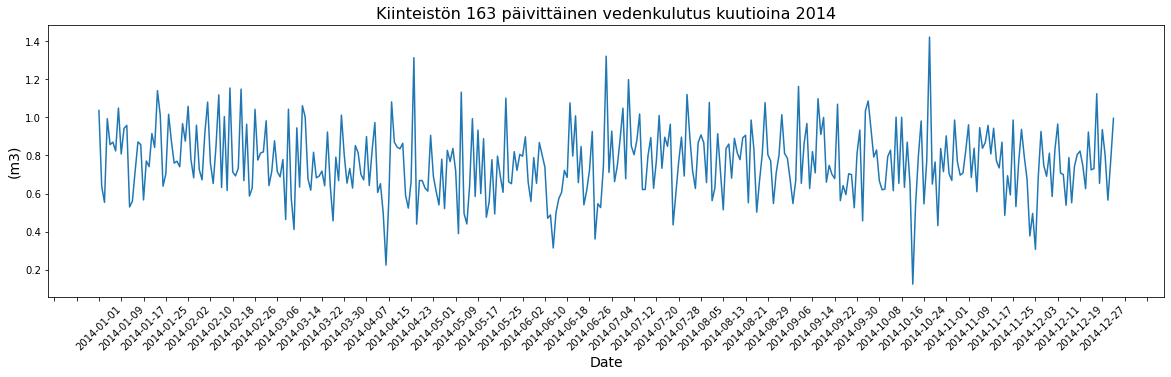

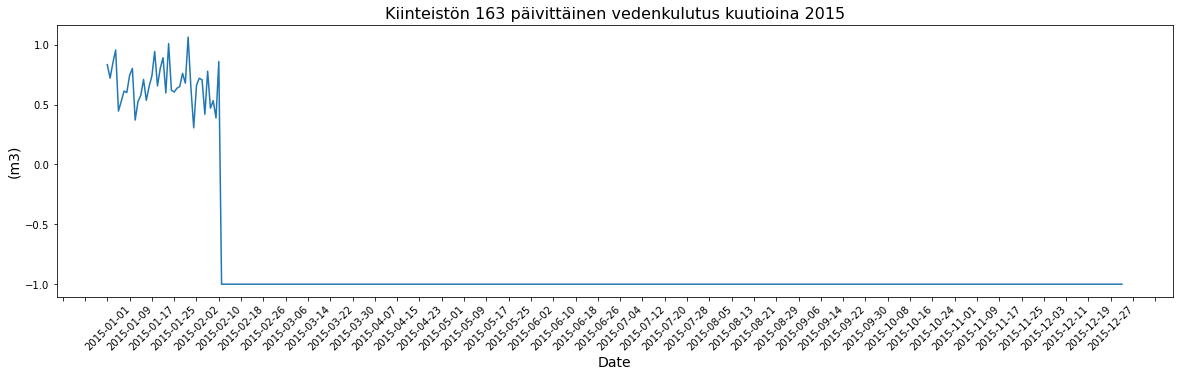

In [35]:
df2=df.copy()

def showGraph(df,dept,year,txt):
    fig, axs = plt.subplots(1, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 5))

    if year!="":
        axs.plot(df['date'][(df['Year'] == int(year))],
                df[dept][(df['Year'] == int(year))])
        axs.set_title(f"Kiinteistön {dept} päivittäinen vedenkulutus kuutioina {year}",size=16)
    else:
        axs.plot(df['date'],df[dept])
        axs.set_title(f"Kiinteistön {dept} päivittäinen vedenkulutus kuutioina {txt}",size=16)
        
    axs.set_ylabel('(m3)', size=14)
    axs.set_xlabel('Date', size=14)
    axs.xaxis.set_major_locator(plt.MaxNLocator(52))
    axs.tick_params(axis='x', rotation=45)
    plt.show()

showGraph(df2,'163','','koko tarkastelujaksona 2012-2015')    
showGraph(df2,'163','2012','')
showGraph(df2,'163','2013','')    
showGraph(df2,'163','2014','')
showGraph(df2,'163','2015','')

Voidaan havaita että poikkeksellisen suurta kulutus on ollut syyskuussa 2013, ennen sitä kulutus on ollut 0 
vuoden 2012 alusta lähtien. Vuoden 2014 ja vuoden 2015 1. kuukausi kulutus on ollut "normaalimmalla" tasolla verrattuna 
muiden kiinteistöjen keskimääräiseen kulutukseen, tosin edelleen moninkertainen. Tämän jälkeen on ollut käyttökatkoa.  
Lähemmin tarkasteltuna kiinnostaa megalomaanisen suuren kulutuksen ajanjakso vuoinna 2013

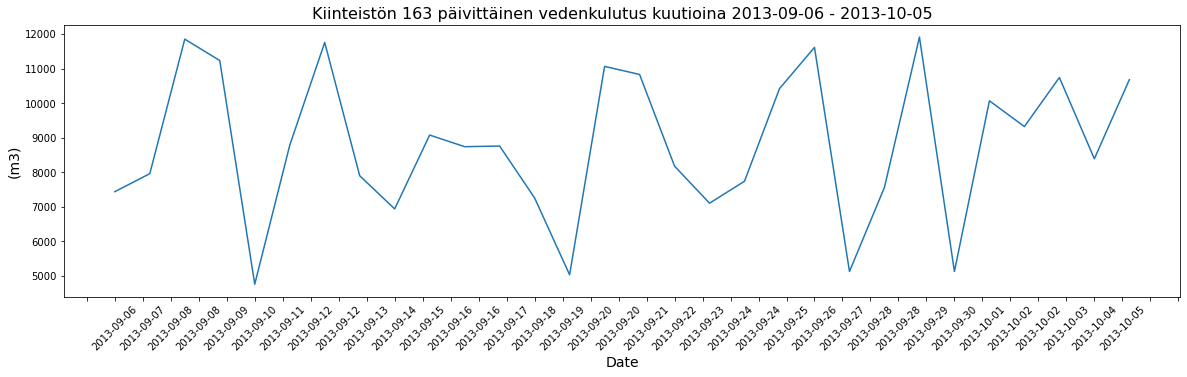

In [36]:
df2=df.copy()
df2=df2[['date',colmaxname]]
df2.replace(-1, 0, inplace=True)
df2=df2.loc[df2[colmaxname] >= 2]
startDate=df2.iloc[0]['date']
endDate=df2.iloc[len(df2.index)-1]['date']
showGraph(df2,'163','',f"{startDate} - {endDate}")

Vuonna 2013 ennen ja jälkeen kulutuksen "superkuukauden"

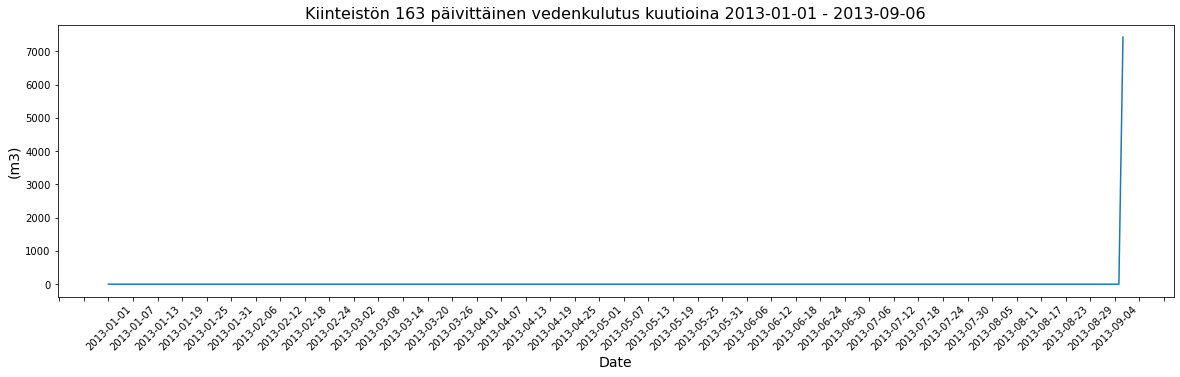

In [40]:
#df4=df4.loc[(df4['date'] >= '2013-09-05') & (df4['date'] <= '2013-10-06')]
df2=df.copy()
df2=df2[['date',colmaxname]]
df2.replace(-1, 0, inplace=True)
df2=df2.loc[df2[colmaxname] >= 2]
endDate=df2.iloc[0]['date']
startDate='2013-01-01'
df2=df.copy()
df2=df2[['date',colmaxname]]
df2.replace(-1, 0, inplace=True)
df2=df2.loc[(df2['date'] >= startDate) & (df2['date'] <= endDate)]


showGraph(df2,'163','',f"{startDate} - {endDate}")

Kulutus on ollut nollassa ennen kun on alkanut kova kulutus.

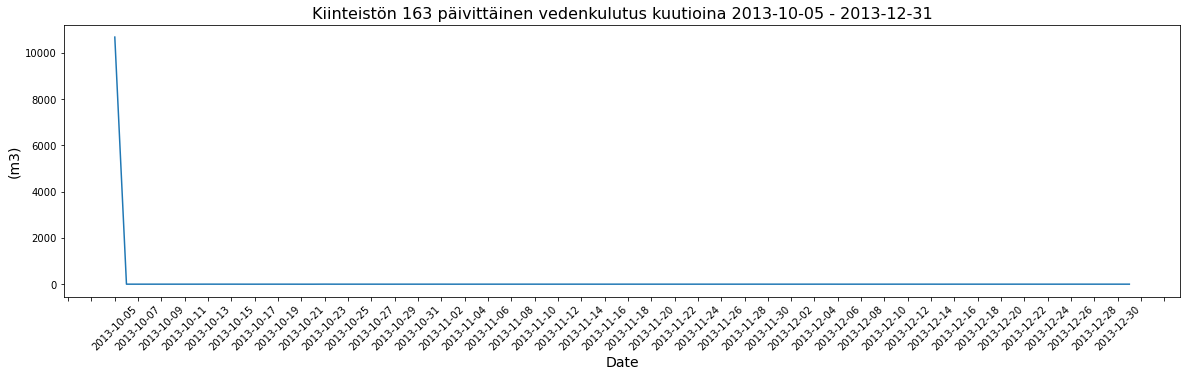

In [41]:
df2=df.copy()
df2=df2[['date',colmaxname]]
df2.replace(-1, 0, inplace=True)
df2=df2.loc[df2[colmaxname] >= 2]
endDate='2013-12-31'
startDate=df2.iloc[len(df2.index)-1]['date']
df2=df.copy()
df2=df2[['date',colmaxname]]
df2.replace(-1, 0, inplace=True)
df2=df2.loc[(df2['date'] >= startDate) & (df2['date'] <= endDate)]

showGraph(df2,'163','',f"{startDate} - {endDate}")

Kulutus kovankulutuksen jälkeen nollassa. Kunnes heti seuraavan vuoden alusta kulutus on ollut "normaali"/keskimääräinen  muihin kiinteistöihin verrattuna. 

##### 4.4.4 Satunnisesti valittujen kiinteistöjen keskimääräinen vedenkulutus kuutioina eri viikonpäivinä aikajaksolla 2013-2015

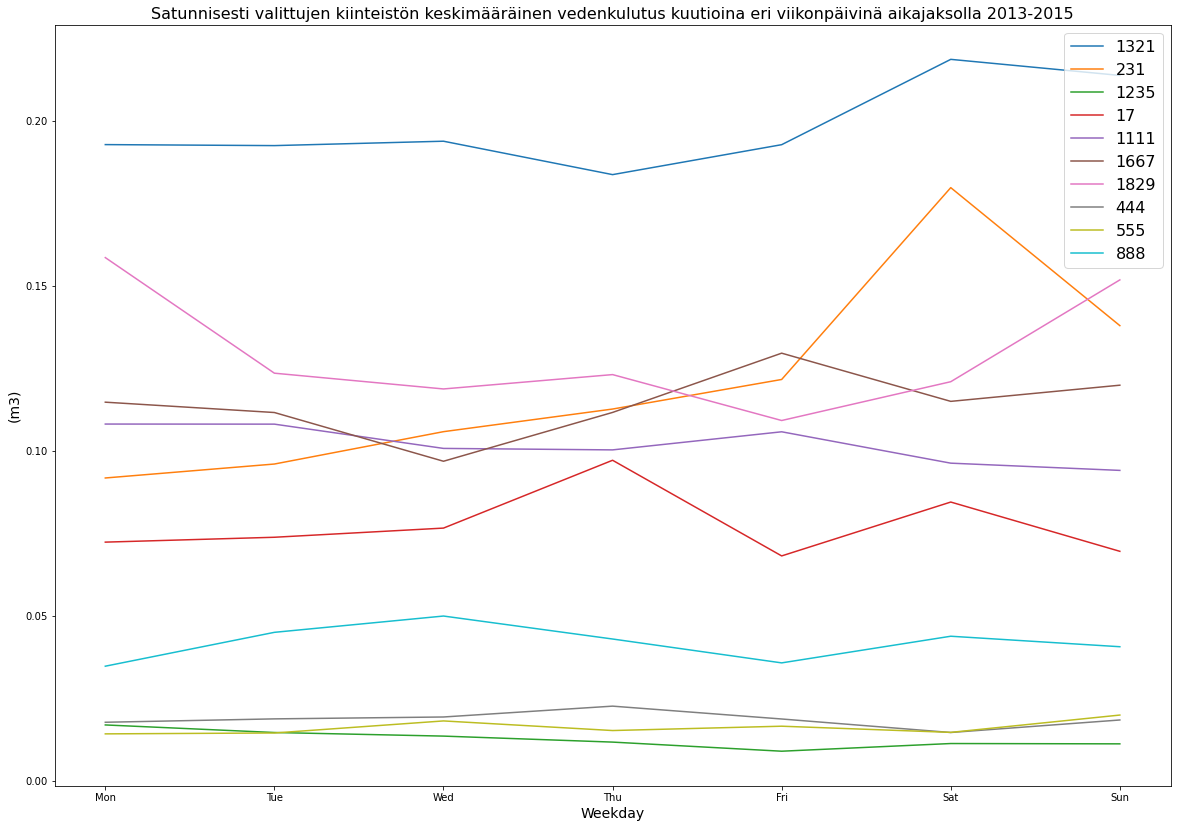

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()

df2.replace(-1, 0, inplace=True)    

days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']

years=list((range(2012,2015+1)))

def getWeekDayData(house):    
    dayData=[]

    for ind in range(0,len(years)):

        dayData.append([])    
        for weekday in days:
            data=df2[house].loc[(df2['Weekday'] == weekday) & (df2['Year'] == int(years[ind]))]            
            dayData[ind].append(data.mean(axis=0))     
                
    dayData=np.mean(dayData, axis=0) 
    return dayData

fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Satunnisesti valittujen kiinteistön keskimääräinen vedenkulutus kuutioina eri viikonpäivinä aikajaksolla 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Weekday', size=14)

houses=['1321','231','1235','17','1111','1667','1829','444','555','888']

for item in houses:
    axs.plot(days,getWeekDayData(item))
axs.legend(houses,fontsize=16)
plt.show()

##### 4.4.5 Kaikkien kiinteistöjen keskimääräinen vedenkulutus eri viikonpäivinä koko tarkastelujason aikana 2012-2015 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


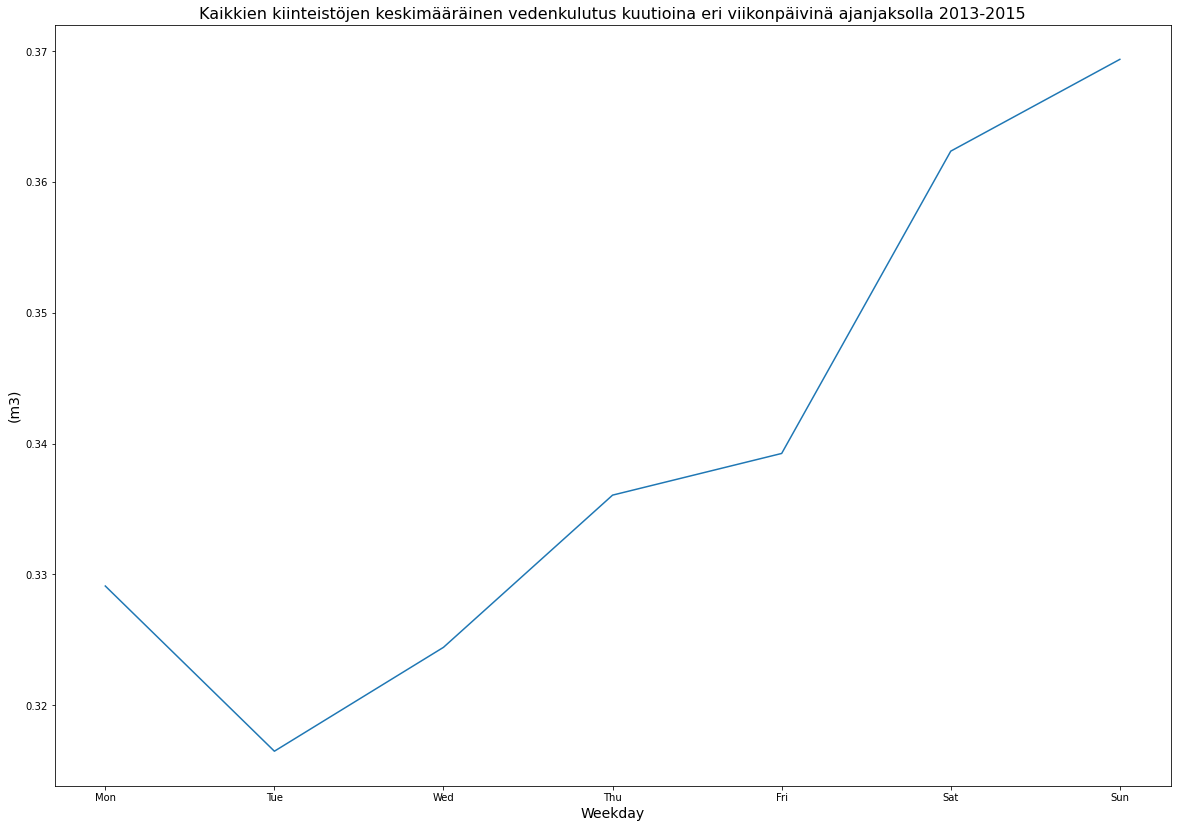

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()

df2.replace(-1, 0, inplace=True)    

columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
dayData=[]

days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']

years=list((range(2012,2015+1)))

def getWeekDayData():    
    dayData=[]

    for ind in range(0,len(years)):

        dayData.append([])    
        for weekday in days:
            data=df2.loc[(df2['Weekday'] == weekday) & (df2['Year'] == int(years[ind]))]            
            for col in columnsToDrop:
                data.drop(col, axis=1, inplace=True)
            dayData[ind].append(data.mean(axis=0).mean())
    
    dayData=np.mean(dayData, axis=0)     
    return dayData

fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina eri viikonpäivinä ajanjaksolla 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Weekday', size=14)

axs.plot(days,getWeekDayData())
plt.show()

##### 4.4.6 Kaikkien kiinteistöjen keskimääräinen vedenkulutus eri viikonpäivinä koko tarkastelujason aikana 2012-2015  (aineistosta poistettu kiinteistö 163 (katso kappale 4.4.1) 
Tässä poistetaan suurin huomattavasti kuluttuva kiinteistö 163 ja tukitaan vaikutus kokonaisuuteen. 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


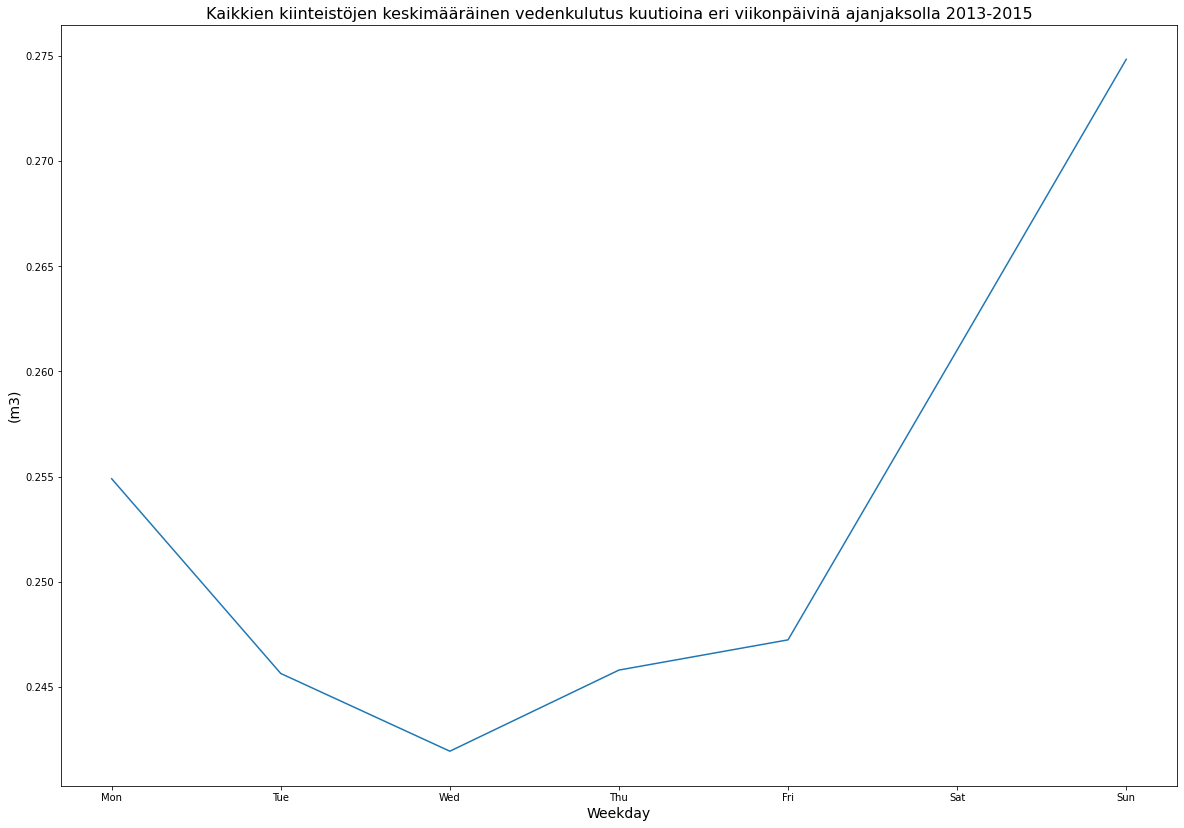

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()

#----------------
df2.drop('163', axis=1, inplace=True)
#----------------

df2.replace(-1, 0, inplace=True)    

columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
dayData=[]

days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']

years=list((range(2012,2015+1)))

def getWeekDayData():    
    dayData=[]

    for ind in range(0,len(years)):

        dayData.append([])    
        for weekday in days:
            data=df2.loc[(df2['Weekday'] == weekday) & (df2['Year'] == int(years[ind]))]            
            for col in columnsToDrop:
                data.drop(col, axis=1, inplace=True)
            dayData[ind].append(data.mean(axis=0).mean())
    
    dayData=np.mean(dayData, axis=0)     
    return dayData

fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina eri viikonpäivinä ajanjaksolla 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Weekday', size=14)

axs.plot(days,getWeekDayData())
plt.show()

##### 4.4.7 Satunnisesti valittujen kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina aikajaksolla 2013-2015
Huom. koodissa on virhe se laskeekin viimeisen vuoden 2015 kuukausien suhteen

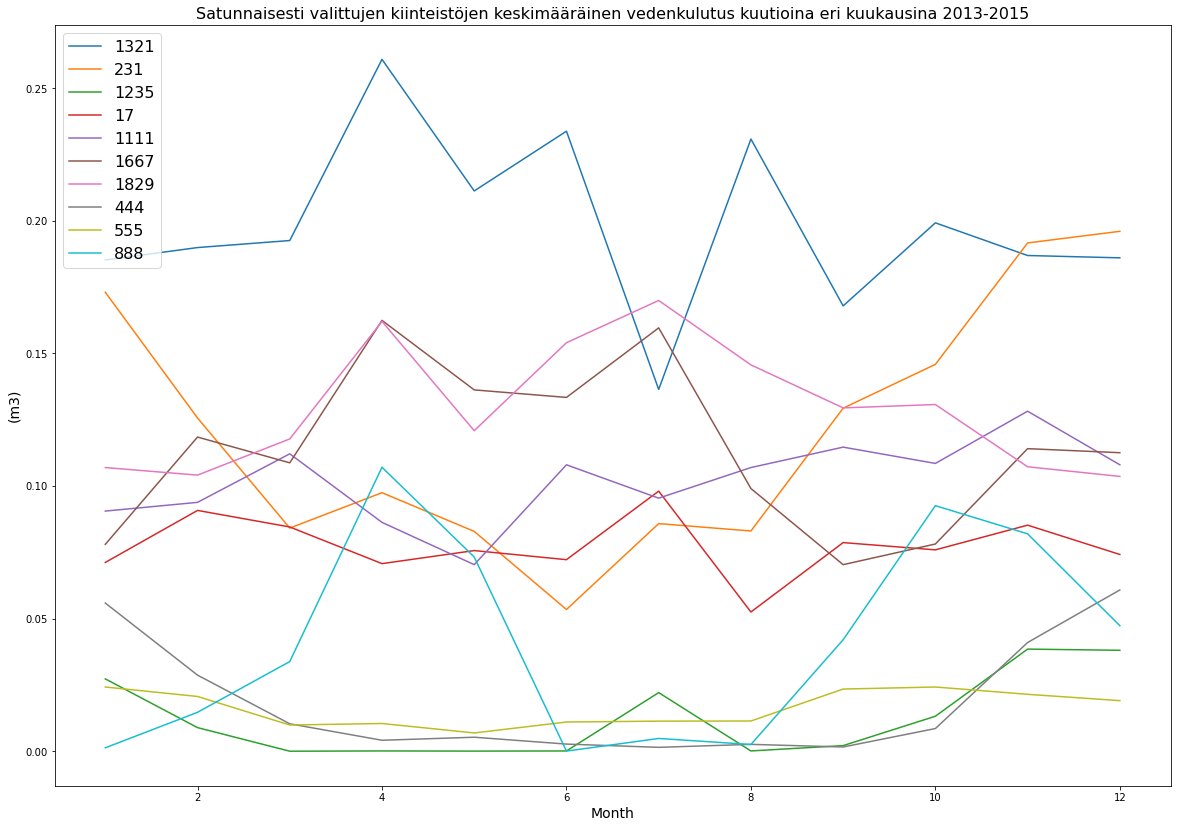

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()

df2.replace(-1, 0, inplace=True)    
months=list(range(1,13))
years=list((range(2012,2015+1)))


def getMonthData(house):

    monthData=[]

    for ind in range(0,len(years)):            
        monthData.append([])    
        for month in months:
            data=df2[house].loc[(df2['Month'] == month) & (df2['Year'] == int(years[ind]))]                
            monthData[ind].append(data.mean(axis=0)) 

    monthData=np.mean(monthData, axis=0) 

    return monthData

fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Satunnaisesti valittujen kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina eri vuosina 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Month', size=14)

houses=['1321','231','1235','17','1111','1667','1829','444','555','888']

for item in houses:    
    axs.plot(months,getMonthData(item))
axs.legend(houses,fontsize=16)            
plt.show()

##### 4.4.8 Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina 2013-2015 

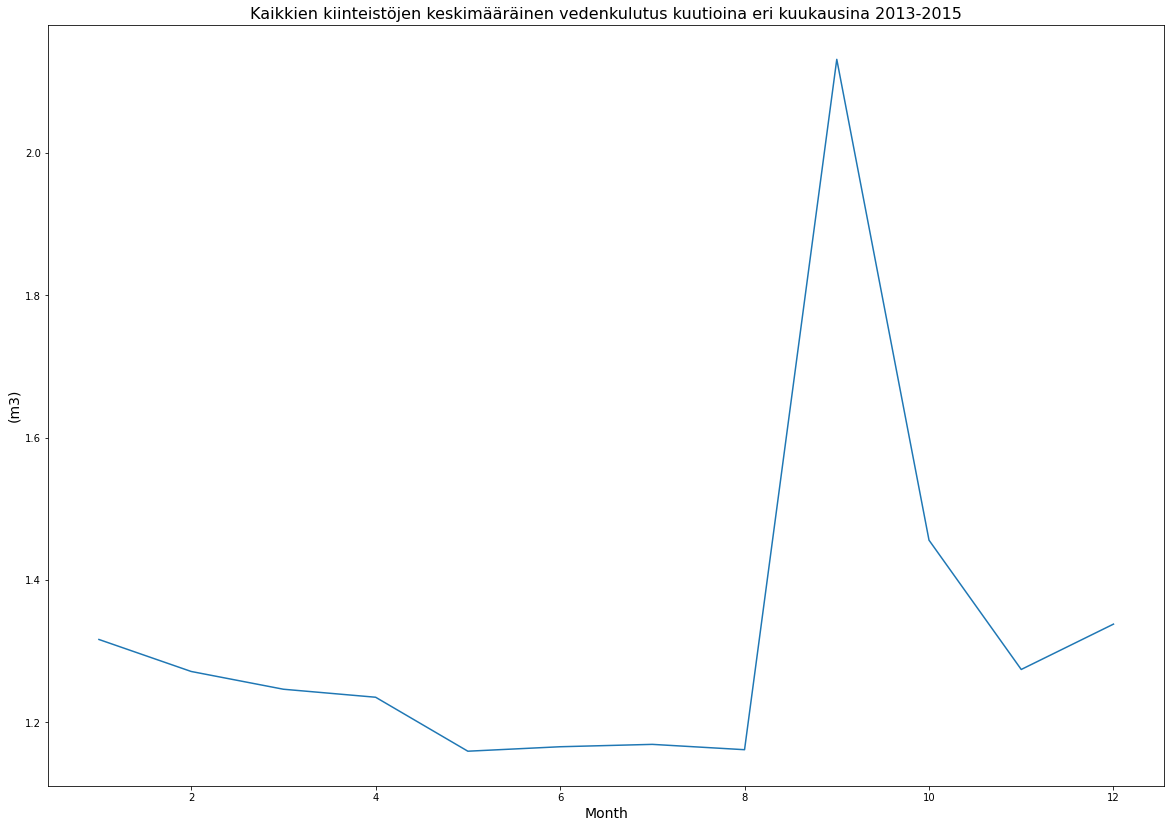

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()

df2.replace(-1, 0, inplace=True)    
months=list(range(1,13))

def getMonthData():

    monthData=[]

    for ind in range(0,len(years)):            
        monthData.append([])    
        for month in months:
            data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(years[ind]))]                
            monthData[ind].append(data.mean(numeric_only=True,axis=0).mean()) 

    monthData=np.mean(monthData, axis=0) 

    return monthData


fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Month', size=14)


axs.plot(months,getMonthData())

plt.show()

##### 4.4.9 Tässä sama kuin edellinen mutta dropataan suurin kuluttaja kiinteistö 163 (voisi dropata muitakin katso 4.4.2)

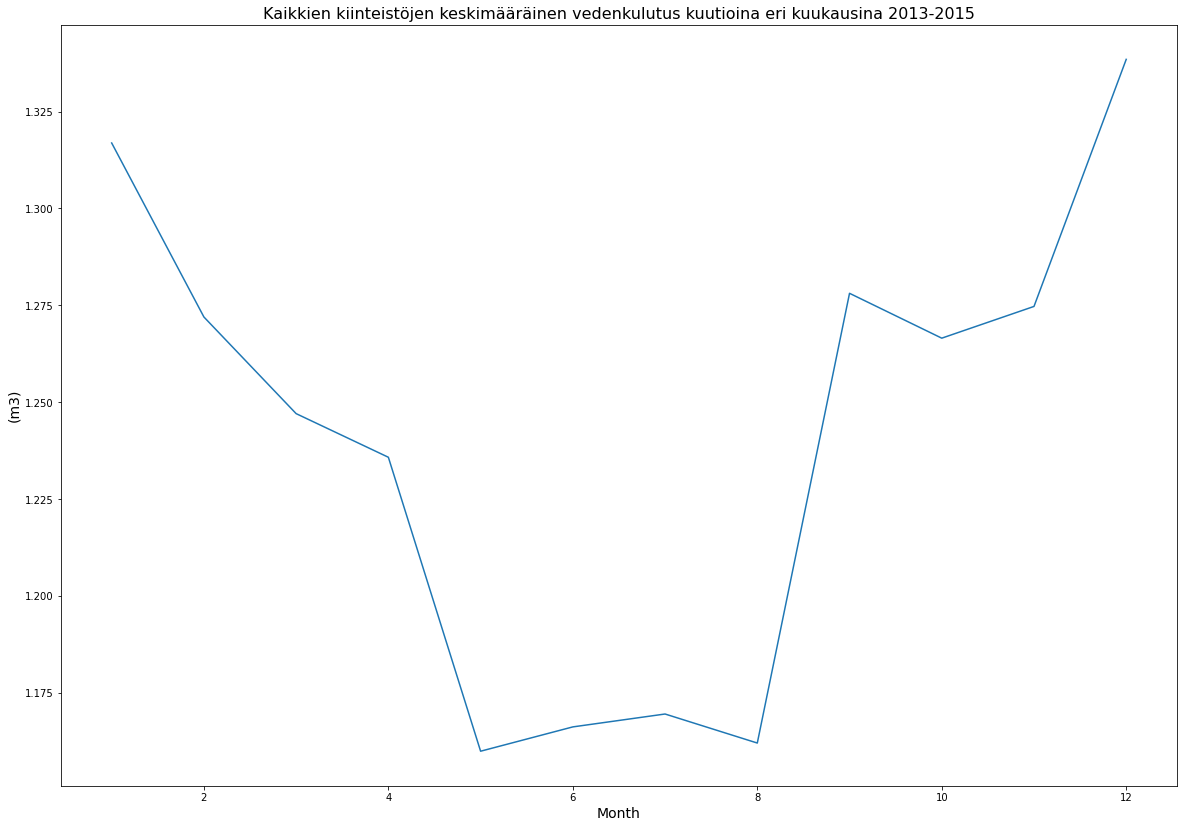

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
df2.drop('163', axis=1, inplace=True)
df2.replace(-1, 0, inplace=True)    
months=list(range(1,13))

def getMonthData():

    monthData=[]

    for ind in range(0,len(years)):            
        monthData.append([])    
        for month in months:
            data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(years[ind]))]                
            monthData[ind].append(data.mean(numeric_only=True,axis=0).mean()) 

    monthData=np.mean(monthData, axis=0) 

    return monthData


fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina 2013-2015', size=16)
axs.set_ylabel('(m3)', size=14)
axs.set_xlabel('Month', size=14)


axs.plot(months,getMonthData())

plt.show()

##### 4.4.10 Kaikkien kiinteistöjen keskimääräinen vedenkulutus eri vuosina eri kuukausina 2012-2015 

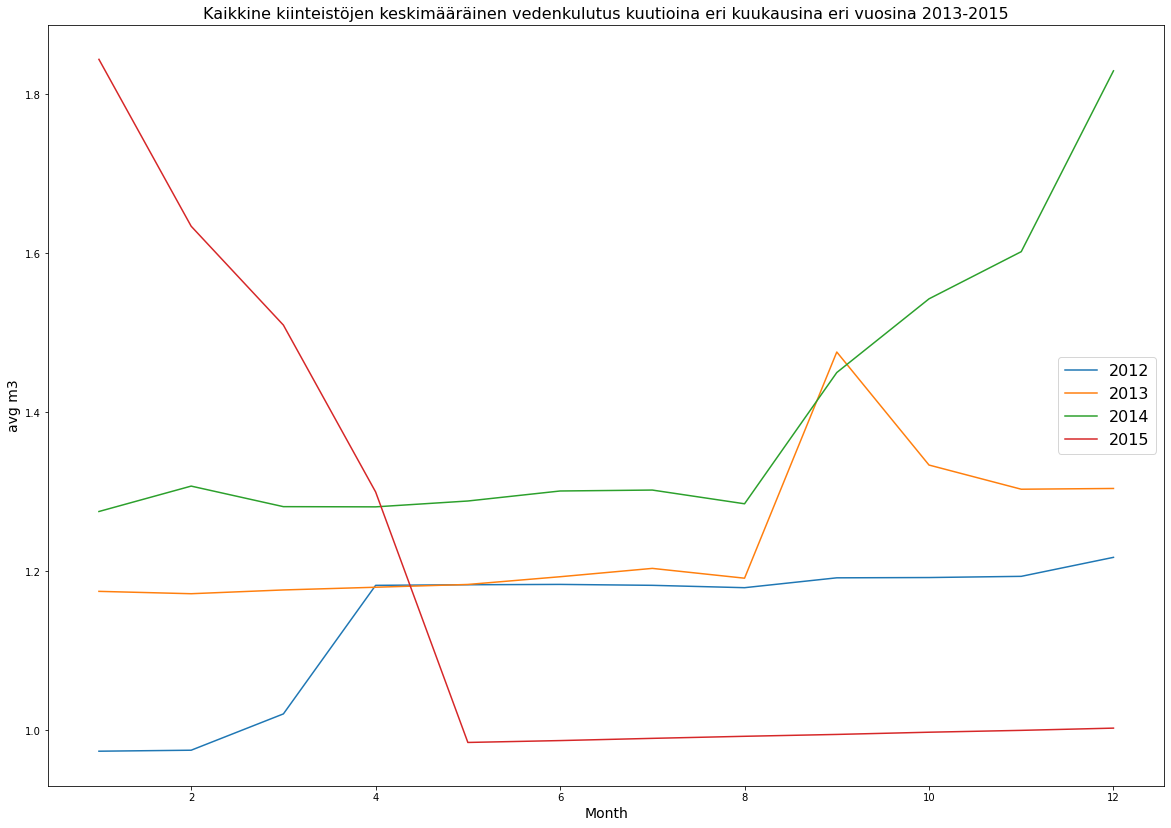

In [45]:
#  tässä dropataan vain suurin kuluttaja kiinteistö 163 mutta voisi dropata muitakin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
#----------------
df2.drop('163', axis=1, inplace=True)
#----------------
df2.replace(-1, 0, inplace=True) 

years=list((range(2012,2015+1))) ## oikeammin oliis filtteröidä eri vuodeT aineistostA

months=list(range(1,13))

def getMonthData(year):
    monthData=[]
    for month in months:
        data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(year))]                
        monthData.append(data.mean(numeric_only=True,axis=0).mean()) 
    return monthData

fig, axs = plt.subplots(1,1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 14))
axs.set_title(
    'Kaikkine kiinteistöjen keskimääräinen vedenkulutus kuutioina eri kuukausina eri vuosina 2013-2015', size=16)
axs.set_ylabel('avg m3', size=14)
axs.set_xlabel('Month', size=14)

axs.plot(months,getMonthData(2012))
axs.plot(months,getMonthData(2013))
axs.plot(months,getMonthData(2014))
axs.plot(months,getMonthData(2015))

axs.legend(years,fontsize=16)


plt.show()

Kuva kertonee hyvin millaista kulutus on ollut eri vuosina, tässä tapuksessa voidaan sanoa, että vuodet eivät ole veljiä keskenään.

#### 4.4.11 Tunnuslukujen laskenta

Liityen tilastollisten tunnuslukujen laskentaan niin poikkeuksille (outliers) pitää tehdä jotakin tapauskohtaisesti, häivyttää massaan tai poistaa kokonaan ksiteltävätä aineistosta. 
Olisi syytä kuitenkin selvittää mistä johtuu poikeuksellisen suuri kulutus ja onko poikkeus vedenkulutuksessa pysyvä vai tilapäinen.
Selvät poikkeukset yleisiä kulutustottumuksia tarkasteltaessa antaa vääärän kuvan.

##### Seuraavassa lasketaan tilastollisia tunnuslukuja eri vuosiin ryhmitettynä

In [144]:
import numpy as np
df2=df.copy()
df2.replace(-1, 0, inplace=True)

cols=df2.columns[1:-5]

df3=df2.groupby("Year")[cols].agg([np.sum, np.mean, np.std, np.min, np.max])
display(df3)

1                                          2                      \
         sum      mean       std   amin   amax      sum      mean       std   
Year                                                                          
2012   0.000  0.000000  0.000000  0.000  0.000    0.000  0.000000  0.000000   
2013  15.638  0.042844  0.065834  0.000  0.218   33.559  0.091942  0.163543   
2014  48.372  0.132526  0.038599  0.071  0.321  103.523  0.283625  0.166320   
2015   5.932  0.016252  0.046959  0.000  0.235   14.095  0.038616  0.122960   

                  ...     2157                                    2158  \
     amin   amax  ...      sum      mean       std amin   amax     sum   
Year              ...                                                    
2012  0.0  0.000  ...  109.179  0.298303  0.228639  0.0  1.025  24.540   
2013  0.0  0.639  ...  151.756  0.415770  0.191202  0.0  1.111  58.445   
2014  0.0  1.115  ...  153.646  0.420948  0.187209  0.0  1.224  60.536   
2015  0.0  0.867  ...   53.083  0.145433  0.246533  0.0  1.446  18.367   

                                        
          mean       std   amin   amax  
Year                                    
2012  0.067049  0.083402  0.000  0.387  
2013  0.160123  0.049945  0.051  0.347  
2014  0.165852  0.050690  0.030  0.415  
2015  0.050321  0.081367  0.000  0.346  

[4 rows x 10425 columns]

##### Tunnuslukuja eri kiinteistäille koko lähdeaineiston osalta

In [51]:
df2.describe().round(4)

1          2          3          5          6          7  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.0479     0.1035     0.0752     0.1321     0.0473     0.1969   
std       0.0680     0.1709     0.1175     0.1957     0.1075     0.2913   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.1110     0.2180     0.1730     0.3100     0.0790     0.4770   
max       0.3210     1.1150     1.4160     1.1740     2.8640     1.3920   

               8         10         11         12         13         14  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.1637     0.0249     0.0130     0.1661     0.0186     0.0925   
std       0.2432     0.0573     0.0276     0.2456     0.0519     0.1291   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.3870     0.0010     0.0280     0.3900     0.0000     0.2190   
max       1.4460     0.3900     0.6440     1.2460     0.4110     0.4840   

              16         17         18         19         20         21  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.2549     0.0773     0.0879     0.0299     0.1915     0.2221   
std       0.3761     0.1513     0.1423     0.0524     0.2793     0.3006   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.5860     0.0450     0.1920     0.0450     0.4540     0.5770   
max       3.7360     0.8710     0.9310     0.2650     1.9090     0.8420   

              22         24         25         26         27         28  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.0713     0.0527     0.0396     0.0471     0.1099     0.0364   
std       0.1075     0.0919     0.0985     0.0687     0.1813     0.0538   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.1530     0.0860     0.0000     0.1050     0.2320     0.0800   
max       0.6330     0.4740     0.7320     0.3430     1.2550     0.3870   

              29         32         33         34         35         37  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.0225     0.0502     0.0329     0.0720     0.1121     0.0646   
std       0.0463     0.0758     0.0523     0.6347     0.1780     0.0998   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.0180     0.1020     0.0610     0.0000     0.2320     0.1350   
max       0.3330     0.3890     0.2990    22.6810     2.2560     0.6980   

              38         39         40         42         43         44  \
count  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000  1461.0000   
mean      0.0416     0.0674     0.0329     0.0583     0.0610     0.0473   
std       0.0608     0.0988     0.0544     0.1027     0.0983     0.0801   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
50%       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
75%       0.0950     0.1500     0.0730     0.1240     0.1440     0.0750   
max       0.3400     0.8450     0.3

##### Summataan satunnaisesti valittujen kiinteistöjen kokonaiskulutus eri vuosina 2012-2015, näytetään ko. kiinteistöjen vuosikulutukset pylväsdiagrammeina ryhmitettyinä eri vuosilla. 

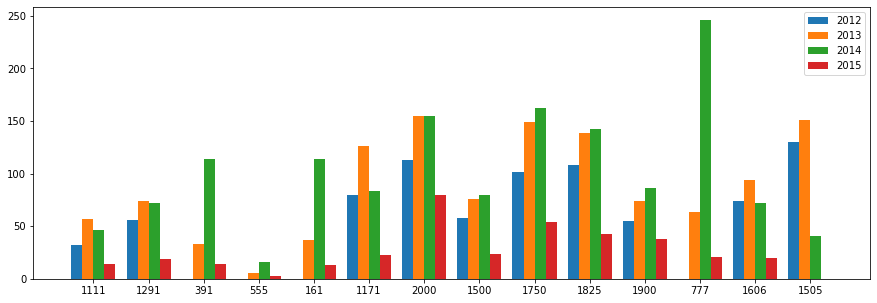

In [11]:
# tämä koodi pitää tehdä uusiksi myöhemmin

df2=df.copy()
df2.replace(-1, 0, inplace=True)
deleted_columns = ['date', 'Month', 'Day', 'Week', 'Weekday']

for column_name in deleted_columns:
    df2.drop(column_name, axis=1, inplace=True)

years=[2012,2013,2014,2015]

# tee funktio years parametriksi
year_sum=[]
for year in years:
    sum=df2[(df2['Year'] == year)].sum()
    year_sum.append(sum)

import numpy as np 
import matplotlib.pyplot as plt 

dept= ['1111','1291','391','555','161','1171','2000','1500','1750','1825','1900','777','1606','1505
def getYearData(sum,dept):    
    ret=[]    
    for item in dept:
        ret.append(sum[item]) 
    return ret

year2012 = getYearData(year_sum[0],dept)
year2013 = getYearData(year_sum[1],dept)
year2014 = getYearData(year_sum[2],dept)
year2015 = getYearData(year_sum[3],dept)

x_axis = np.arange(len(dept))

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(x_axis -0.3, year2012, width=0.2, label = '2012')
plt.bar(x_axis -0.1, year2013, width=0.2, label = '2013')
plt.bar(x_axis +0.1, year2014, width=0.2, label = '2014')
plt.bar(x_axis +0.3, year2015, width=0.2, label = '2015')

plt.xticks(x_axis, dept)

plt.legend()

plt.show()

 ##### hist()-metodi

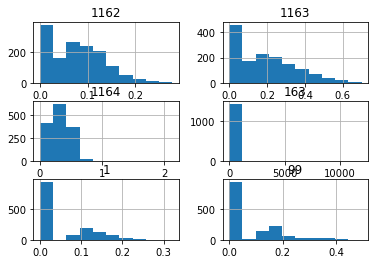

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
df2.replace(-1, 0, inplace=True)
columnsToDrop = ['date', 'Month', 'Day', 'Week', 'Weekday']

for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)

df2[['1162','1163','1164','163','1','99']].hist();


#### 4-5 Mieti mitä tällä datalla voidaan mahdollisesti tehdä?

Voidaan tehdä erilaisia yhteenvetoja, visualisoida graafeja/diagrammeja, joista voidaan seurata kulutsustrendiä
Data voidaan mallintaa ja jos toimiva menetelmä löytyy niin voidaan ennustaa tulevaa kulutusta.

Vesiyhtiö voi datan perustella resursoida tulevaisuuden varalle, säätää kapasitetti kysyntää vastavaksi, 
samoin myös mahd. vedensääntely voidaan jyvittää tiedon pohjalta.
Mahd. vuotojen tms. vikojen havaitseminen (ajoissa), mittari voi myös viallinen tai kalibroinnin tarpeessa. 
Voitasiin asettaa kulutusrajoja, jolloin niiden selvät poikkemat aiheuttaisi hälyytyksen tms. huomion 
tilanteen tarkastamiseksi.